In [2]:
import json
import logging 
import sys

from similarity import (binarize_recipes_data_limited_ingredients,
                        calculate_scores,
                        compute_nearest_neighbors)

with open("data/binarized_recipes_data_limited_ingredients.json") as f:
    recipes_binarized_limited = json.load(f)

scores = calculate_scores(recipes_binarized_limited)



36363
26142
2862
29227
22893
18122
24882
14306
30074
19089
27133
27146
22105
32371
9795
14199
11211
19916
32685
17151
10348
19696
12718
28707
25196
24195
9968
24680
12519
108
2251
24358
24687
8971
9404
39150
28527
40561
27978
28442
19538
2966
3192
3812
4924
3129
22201
22360
27352
17190
13121
13069
13139
13110
12995
13199
27364
16426
17222
17243
27681
38662
3822
22373
21940
23639
14645
30189
12004
19307
19066
24973
36969
29644
34367
43888
28299
20471
31012
19395
35174
29195
26126
29478
32713
28736
19837
19252
9950
24540
40027
28214
9920
39247
9904
26762
11288
3746
2916
35185
39499
30986
2793
12950
29752
21748
22645
34394
33363
26084
31602
29837
43947
34446
32667
41711
17962
21995
4096
45202
20015
15541
30062
29613
32611
22175
13156
30383
17977
229
13090
33192
20424
20404
20390
4711
12419
12494
16269
16284
32545
28139
22352
29887
29057
14582
10221
13144
20082
32156
44380
3689
42631
17667
16287
37970
45069
35761
5523
15645
42572
28960
26848
16453
14651
22198
17057
13127
25625
8927
21980
3

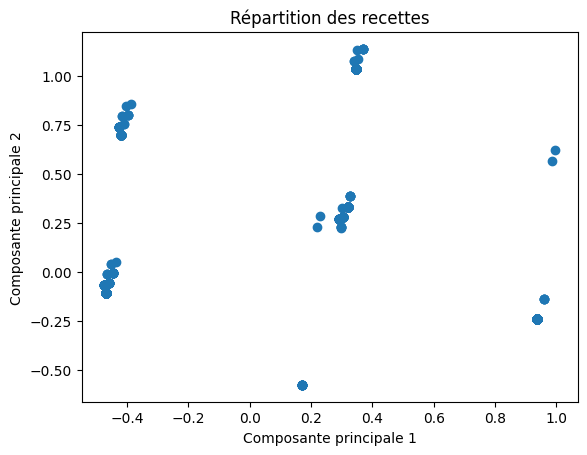

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Conversion du dictionnaire en une liste de vecteurs
vectors = [recipes_binarized_limited[key] for key in recipes_binarized_limited]

# Réduction de dimensionnalité PCA
"""
a PCA est une technique utilisée pour réduire la dimensionnalité 
d'un ensemble de données en trouvant les directions principales le long 
desquelles les données varient le plus. Ces directions principales sont 
appelées composantes principales.

Lorsque vous effectuez une PCA et projetez les 
données sur un espace de dimension inférieure (dans ce cas, 2 dimensions), 
les coordonnées X et Y correspondent aux valeurs des deux premières composantes principales.
"""
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

# Extraction des coordonnées X et Y à partir des données projetées
X = projected[:, 0]
Y = projected[:, 1]

# Création du plot en 2D
plt.scatter(X, Y)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Répartition des recettes')
plt.show()

In [10]:
import mysql.connector
import json

from Data.BD.config import config

def get_recipes_from_id(recipe_id, knn):
    # Créer une connexion à la base de données MySQL
    cnx = mysql.connector.connect(**config)

    # Créer un curseur pour exécuter les requêtes SQL
    cursor = cnx.cursor()

    recipe_ids = knn[str(recipe_id)]["nearest_N"]

    where_clause = " OR ".join(["r.recipe_id = %s"] * len(recipe_ids))
    query = """
    SELECT DISTINCT r.recipe_id, r.name, r.cuisine
    FROM recipes r
    WHERE r.recipe_id = {}
    """.format(where_clause)
    data = tuple(recipe_ids)
    cursor.execute(query, data)

    # Récupérer les résultats de la requête
    results = cursor.fetchall()

    # Valider les modifications dans la base de données
    cnx.commit()

    # Fermer la connexion et le curseur
    cursor.close()
    cnx.close()

    recipes = {"name": [], "recipe_id": [], "origine": []}
    for row in results:
        recipe_id = row[0]
        recipe_name = row[1]
        recipe_origine = row[2]

        recipes["name"].append(recipe_name)
        recipes["recipe_id"].append(recipe_id)
        recipes["origine"].append(recipe_origine)

    return recipes


In [16]:
knn = compute_nearest_neighbors(scores, 5, False)
r = get_recipes_from_id("42307", knn)

In [17]:
r

{'name': ['Le truc du veau',
  'Pâtes au canard fumé, au maïs doux et aux champignons',
  "Jeune lapin rôti avec gnocchi et fricasse de légumes de printemps, purée d'épinards et mousse de morilles",
  'Caille Wellington'],
 'recipe_id': [20638, 30643, 31045, 34440],
 'origine': ['Caribbean', 'USA', 'USA', 'USA']}